In [12]:
import numpy as np

import matplotlib.pyplot as plt

In [46]:
xlabels = [10**(i*0.25 - 5) for i in range(1, 129, 25)]
xticks = [i for i in range(1, 129, 25)]

In [50]:
xvalues = [10**(i * 0.25 - 5) for i in range(1, 17)]

In [67]:
def compare_methods_plot(rhapsodie_path, adir_path, double_difference_path=None):
    with open(rhapsodie_path, 'r') as r_file:
        r_lines = r_file.readlines()
        r_values = [list(map(float, line.split())) for line in r_lines]
    # Transpose the values to separate columns
    r_values = np.array(r_values).T

    with open(adir_path, 'r') as a_file:
        a_lines = a_file.readlines()
        a_values = [list(map(float, line.split())) for line in a_lines]
    # Transpose the values to separate columns
    a_values = np.array(a_values).T

    print(len(a_values[5]), a_values[5])
    plt.plot(xvalues, r_values[3], label='Iu - Rhapsodie')
    plt.plot(xvalues, a_values[5], label='Iu - ADIR')
    plt.title('RMSE for Iu over regularization parameter')
    plt.xlabel('Regularization parameter')
    plt.ylabel('RMSE')
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.plot(xvalues, r_values[4], label='Ip - Rhapsodie')
    plt.plot(xvalues, a_values[8], label='Ip - ADIR')
    plt.title('RMSE for Ip over regularization parameter')
    plt.xlabel('Regularization parameter')
    plt.ylabel('RMSE')
    plt.legend()
    plt.grid(True)
    # axs[1].xticks(ticks=xticks, labels=xlabels)
    plt.show()
    plt.plot(xvalues, [abs(r_values[5][i]) / 100595 for i in range(16)], label='theta - Rhapsodie')
    plt.plot(xvalues, a_values[9], label='theta - ADIR')
    plt.title('RMSE over regularization parameter')
    plt.xlabel('Regularization parameter')
    plt.ylabel('RMSE')
    plt.legend()
    plt.grid(True)
    # axs[2].xticks(ticks=xticks, labels=xlabels)
    plt.show()
    

16 [86137.12878547 85376.79586784 86172.66335386 85902.37095029
 86298.54510384 86968.12480981 87385.81948587 85968.7779553
 85373.65619124 86991.10353389 87797.20236532 85279.50033835
 87932.62617825 87201.27669635 87323.33343904 88358.15369907]


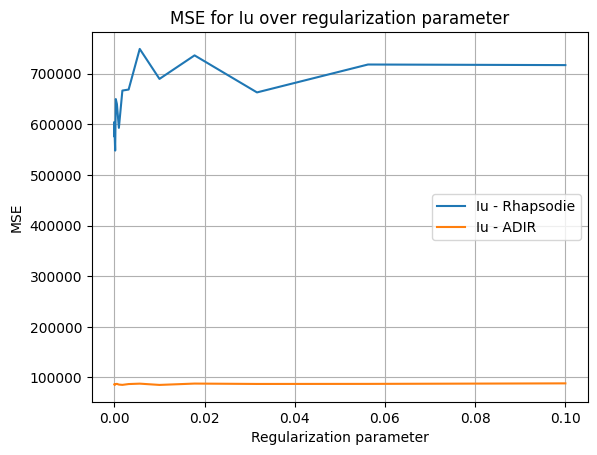

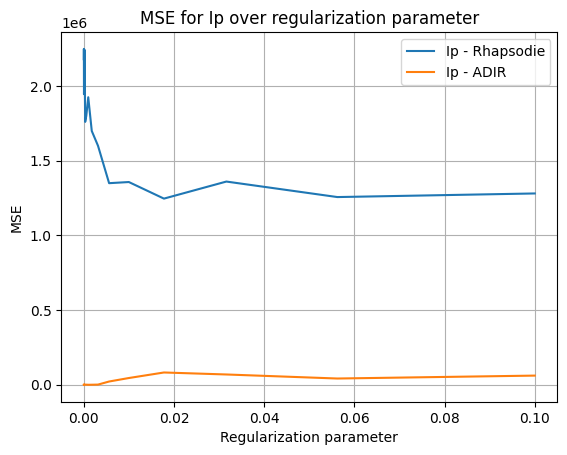

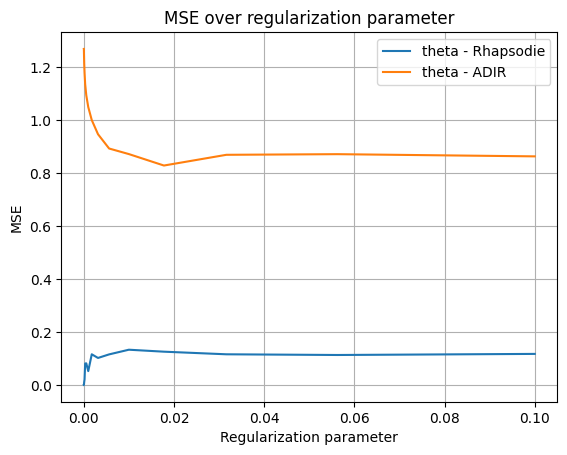

In [68]:
compare_methods_plot('../test_results/methods_comparison/mse_list_base_rhapsodie.txt', '../test_results/methods_comparison/mse_list_adir.txt')

In [10]:
def plot_base_rhapsodie_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        values = [list(map(float, line.split())) for line in lines]
    # Transpose the values to separate columns
    values = np.array(values).T
    print(len(values))

    fig, axs = plt.subplots(3, 1, figsize=(10, 15))
    axs[0].plot(values[3], label='Iu')
    axs[0].set_title('MSE over regularization parameter')
    axs[0].set_xlabel('Regularization parameter')
    axs[0].set_ylabel('MSE')
    axs[0].legend()
    axs[0].grid(True)    

    axs[1].plot(values[4], label='Ip')
    axs[1].set_title('MSE over regularization parameter')
    axs[1].set_xlabel('Regularization parameter')
    axs[1].set_ylabel('MSE')
    axs[1].legend()
    axs[1].grid(True)
    # axs[1].xticks(ticks=xticks, labels=xlabels)

    axs[2].plot(values[5], label='theta')
    axs[2].set_title('MSE over regularization parameter')
    axs[2].set_xlabel('Regularization parameter')
    axs[2].set_ylabel('MSE')
    axs[2].legend()
    axs[2].grid(True)
    plt.xticks(ticks=xticks, labels=[f'{x:.2e}' for x in xlabels])
    # axs[2].xticks(ticks=xticks, labels=xlabels)
    plt.tight_layout()
    plt.show()
    
def plot_MSE_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        values = [list(map(float, line.split())) for line in lines]
    # Transpose the values to separate columns
    values = np.array(values).T
    print(len(values))

    fig, axs = plt.subplots(3, 1, figsize=(10, 15))

    axs[0].plot(values[0], label='I_tot')
    axs[0].plot(values[6], label='I_star')
    axs[0].plot(values[7], label='Iu_disk')
    axs[0].set_title('MSE over regularization parameter')
    axs[0].set_xlabel('Regularization parameter')
    axs[0].set_ylabel('MSE')
    axs[0].legend()
    axs[0].grid(True)    

    axs[1].plot(values[3], label='Q')
    axs[1].plot(values[4], label='U')
    axs[1].plot(values[8], label='Ip')
    axs[1].set_title('MSE over regularization parameter')
    axs[1].set_xlabel('Regularization parameter')
    axs[1].set_ylabel('MSE')
    axs[1].legend()
    axs[1].grid(True)
    # axs[1].xticks(ticks=xticks, labels=xlabels)

    axs[2].plot(values[9], label='theta')
    axs[2].set_title('MSE over regularization parameter')
    axs[2].set_xlabel('Regularization parameter')
    axs[2].set_ylabel('MSE')
    axs[2].legend()
    axs[2].grid(True)
    # plt.xticks(ticks=xticks, labels=[f'{x:.2e}' for x in xlabels])
    axs[2].xticks(ticks=xticks, labels=xlabels)
    plt.tight_layout()
    plt.show()

6


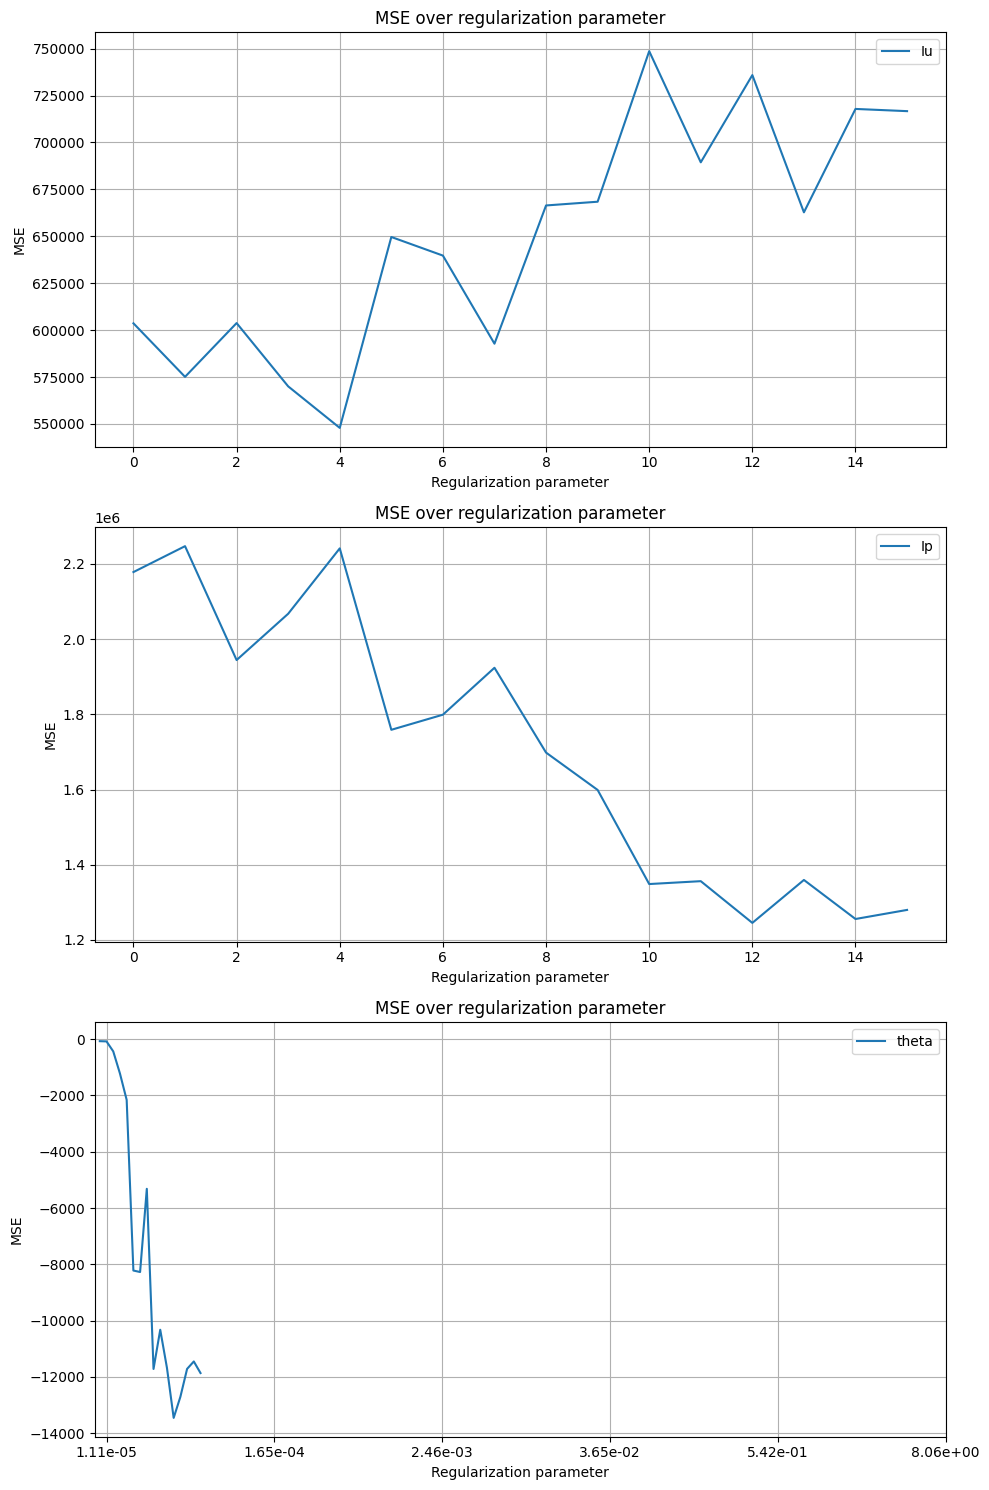

In [11]:
plot_base_rhapsodie_from_file("../test_results/rhapsodie_method_results/mse_list_base_rhapsodie.txt")

In [6]:
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from matplotlib.colors import PowerNorm, SymLogNorm

def compare_plot_atom(file1_path, file2_path):
    hdulist1 = fits.open(file1_path)
    hdulist2 = fits.open(file2_path)
    
    imgs1 = hdulist1[0].data[:10]
    imgs2 = hdulist2[0].data[:10]
    
    hdulist1.close()
    hdulist2.close()
    num_cols = 2
    num_rows = 2
    idx = 0
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(9, 9))
    fig.subplots_adjust(0.1, 0.1, 0.9, 0.9, 0.1, 0.6) # Bottom, top, left, right, wspace, hspace
    norm = SymLogNorm(1, vmin=-100, vmax=100)
    cmap = 'PuOr'
    ax = axs[idx, 1]
    imshow = ax.imshow(imgs1[3], cmap=cmap, norm=norm)
    ax.set_title(f'Over regularized - Q')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.colorbar(imshow, format='%.0e')
    
    
    ax = axs[idx, 0]
    imshow = ax.imshow(imgs2[3], cmap=cmap, norm=norm)
    ax.set_title(f'Under regularized - Q')
    ax.set_xticks([])
    ax.set_yticks([])
    
    idx += 1
    norm = SymLogNorm(1, vmin=-100, vmax=100)
    cmap = 'PuOr'
    ax = axs[idx, 1]
    imshow = ax.imshow(imgs1[4], cmap=cmap, norm=norm)
    ax.set_title(f'Over regularized - U')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.colorbar(imshow, format='%.0e')
    
    
    ax = axs[idx, 0]
    ax.imshow(imgs2[4], cmap=cmap, norm=norm)
    ax.set_title(f'Under regularized - U')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()
    

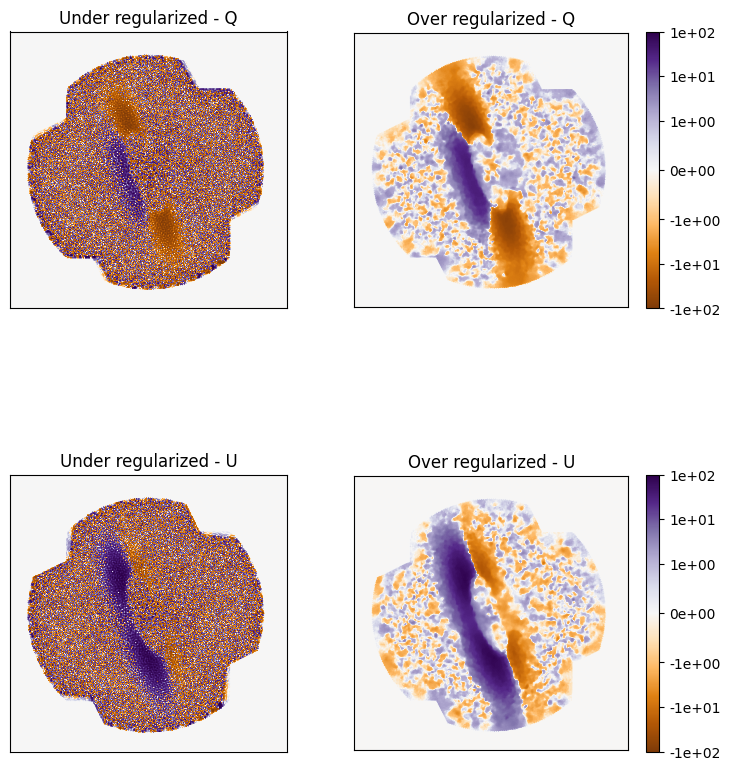

In [283]:
compare_plot_atom("../test_results/rhapsodie_method_results/max_iter_100/RHAPSODIE_non_linear_results_regul_param_100000(over_regul).fits", "../test_results/rhapsodie_method_results/max_iter_100/RHAPSODIE_non_linear_results_regul_param_1.0e-15(under_regul).fits")

In [278]:
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from matplotlib.colors import PowerNorm, SymLogNorm

titles = ['I_tot', 'I_star', 'I_disk', 'Q', 'U', 'Iu', 'Iu_star', 'Iu_disk', 'Ip', 'theta']

def compare_files(file1_path, file2_path, n_first):
    hdulist1 = fits.open(file1_path)
    hdulist2 = fits.open(file2_path)
    
    imgs1 = hdulist1[0].data[:n_first]
    imgs2 = hdulist2[0].data[:n_first]
    
    hdulist1.close()
    hdulist2.close()
    
    num_images = min(len(imgs1), len(imgs2))
    num_cols = 2
    num_rows = 4
    idx = 0
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(9, 18))
    fig.subplots_adjust(0.1, 0.1, 0.9, 0.9, 0.015, 0.3) # Bottom, top, left, right, wspace, hspace
    for i in range(num_images):
        if titles[i] in ['Q', 'U']:
            norm = SymLogNorm(1, vmin=-100, vmax=100)
            cmap = 'PuOr'
        elif titles[i] in ['Ip', 'theta']:
            norm = PowerNorm(gamma=0.25)
            cmap = 'gist_heat'
        else:
            continue
        ax = axs[idx, 1]
        ax.imshow(imgs1[i], cmap=cmap, norm=norm)
        ax.set_title(f'Over regularized - {titles[i]}')
        ax.set_xticks([])
        ax.set_yticks([])
        
        
        ax = axs[idx, 0]
        imshow = ax.imshow(imgs2[i], cmap=cmap, norm=norm)
        ax.set_title(f'Under regularized - {titles[i]}')
        ax.set_xticks([])
        ax.set_yticks([])
        plt.colorbar(imshow, format='%.0e')
        idx += 1
    
    # plt.tight_layout()
    plt.show()

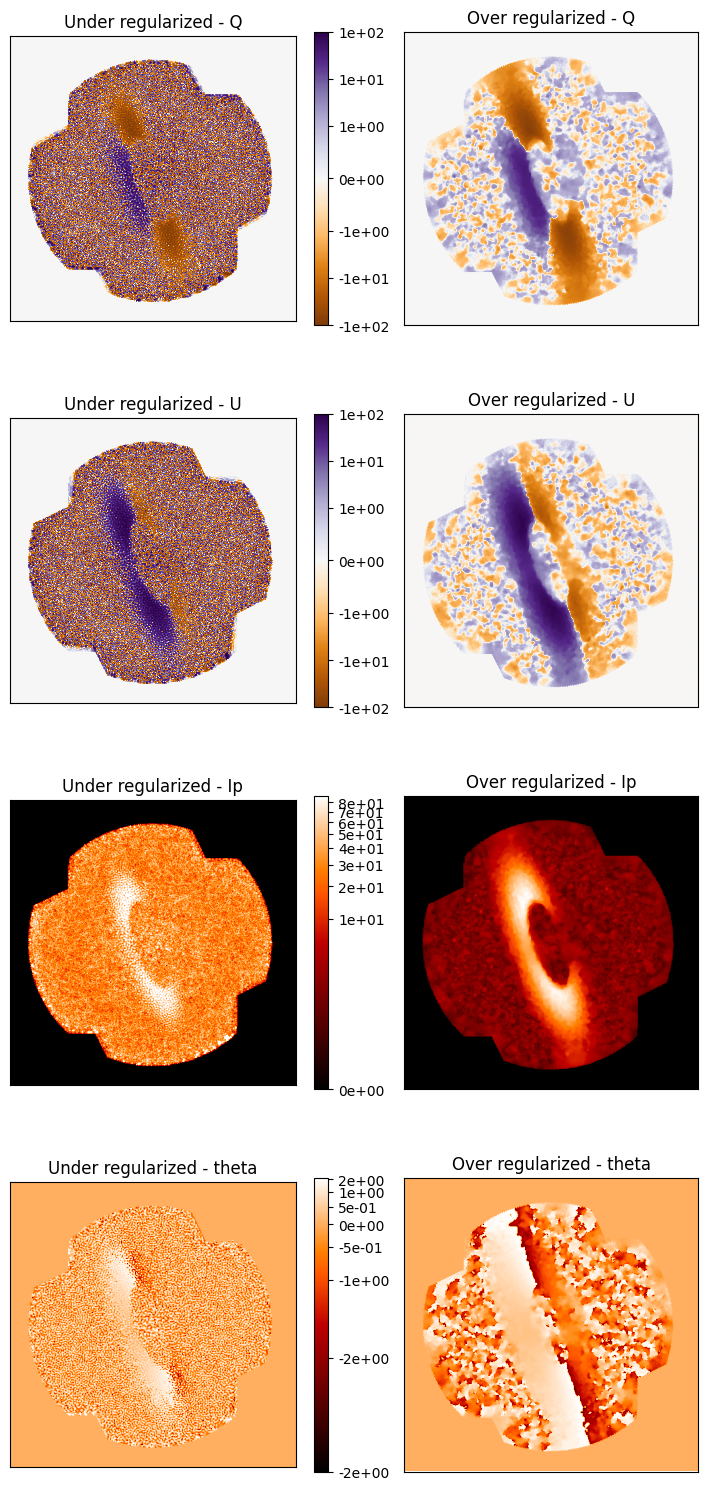

In [279]:
compare_files("../test_results/rhapsodie_method_results/max_iter_100/RHAPSODIE_non_linear_results_regul_param_100000(over_regul).fits", "../test_results/rhapsodie_method_results/max_iter_100/RHAPSODIE_non_linear_results_regul_param_1.0e-15(under_regul).fits", 10)

In [323]:
import astropy.io.fits as fits
import matplotlib.pyplot as plt

def plot_single_image(file_path, norm=None):
    hdulist = fits.open(file_path)
    imgs = hdulist[0].data
    hdulist.close()
    plt.imshow(imgs[0], cmap='gray', norm=norm)
    plt.title("Data Sample")
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.show()

In [311]:
def plot_fits_images(file_path, norm=None):
    hdulist = fits.open(file_path)
    imgs = hdulist[0].data
    hdulist.close()
    num_images = len(imgs)
    fig, axs = plt.subplots(2, 5, figsize=(12, 6))
    for i in range(num_images):
        if titles[i] == 'Q' or titles[i] == 'U':
            norm = SymLogNorm(1, vmin=-100, vmax=100)
            cmap = 'PuOr'
        else:
            norm = PowerNorm(gamma=0.25)
            cmap = 'gist_heat'
        curr_img = imgs[i]
        ax = axs[i // 5, i % 5]
        ax.imshow(curr_img, cmap=cmap, norm=norm)
        ax.set_title(titles[i])
        ax.set_xticks([])
        ax.set_yticks([])
    plt.tight_layout()
    plt.show()

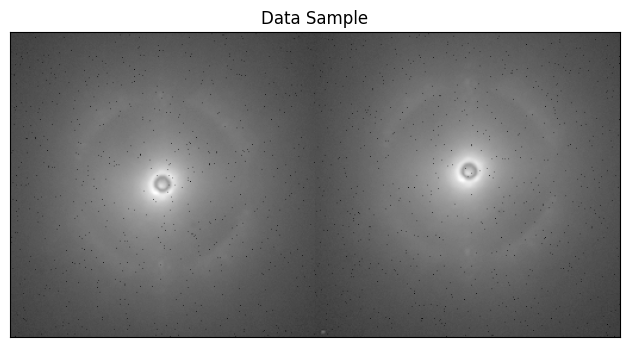

In [326]:
plot_single_image("../test_results/DATA.fits", norm=PowerNorm(gamma=0.25))

Number of images: 10


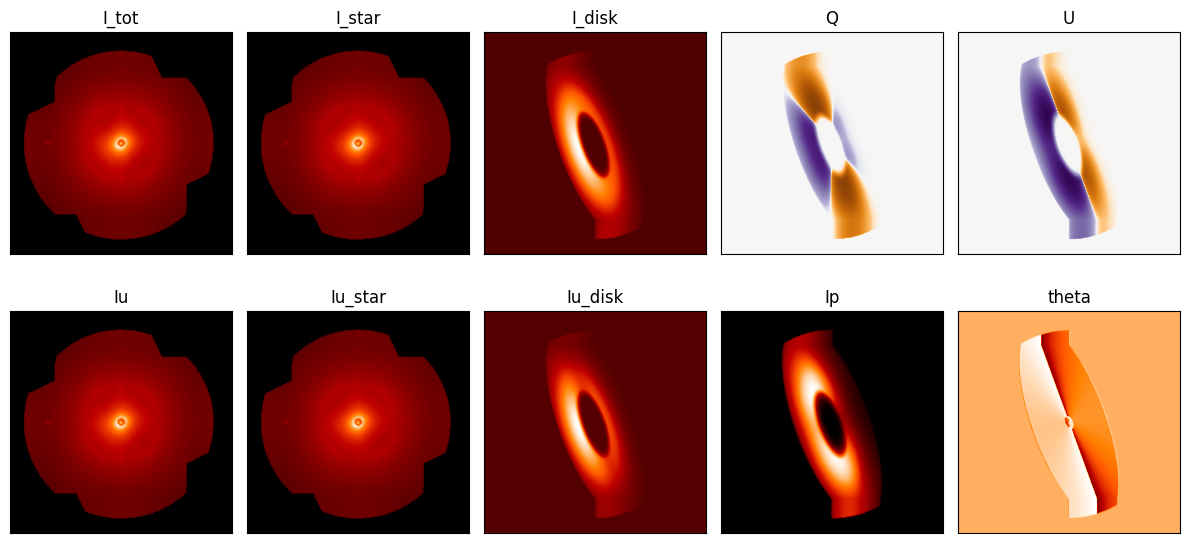

In [285]:
plot_fits_images("../test_results/TRUE.fits", norm=PowerNorm(gamma=0.25))

Number of images: 10


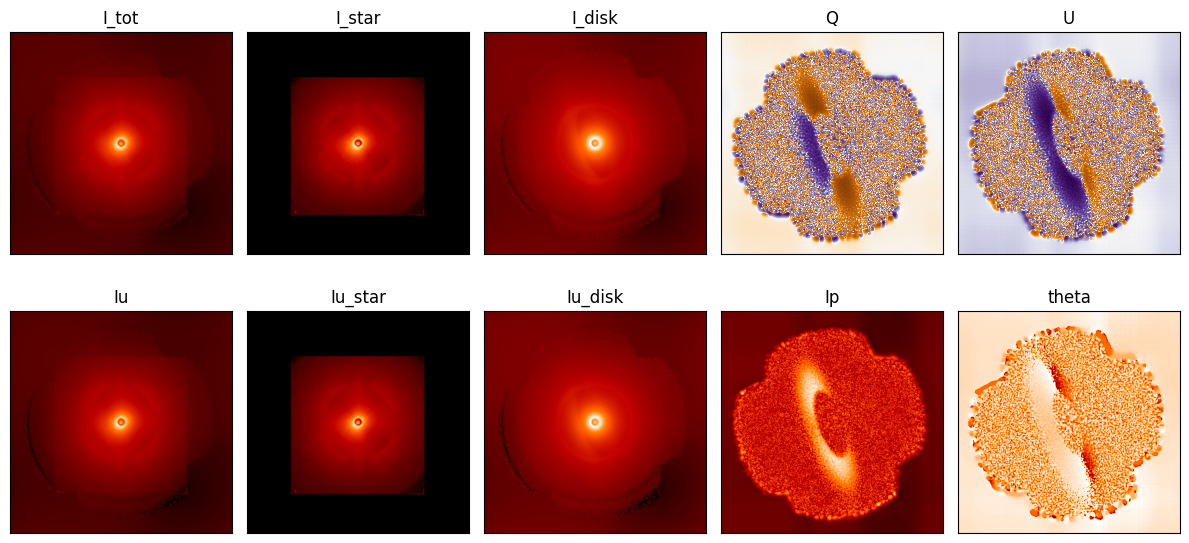

In [286]:
plot_fits_images("../test_results/rhapsodie_method_results/max_iter_100/RHAPSODIE_non_linear_results_regul_param_0.001.fits", norm=PowerNorm(gamma=0.25))